# **Experiment Notebook**



## Context


## Data dictionary :

1. ssn: Social Security Number (Personal Identifier)
2. cc_num: Credit Card Number (Personal Identifier)
3. first: First Name (Personal Identifier)
4. last: Last Name (Personal Identifier)
5. gender: Gender
6. street: Street Address
7. city: City
8. state: State
9. zip: Zip Code
10. lat: Latitude
11. long: Longitude
12. city_pop: City Population
13. job: Occupation/Job Title
14. dob: Date of Birth
15. acct_num: Account Number
16. trans_num: Transaction Number
17. unix_time: Unix Timestamp of Transaction
18. category: Transaction Category
19. amt: Transaction Amount
20. is_fraud: Fraud Indicator (if available)
21. merchant: Merchant Name
22. merch_lat: Merchant Latitude
23. merch_long: Merchant Longitude

### 0. Import Packages

In [2]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 92.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.1.1 which is incompatible.


In [3]:
import pandas as pd
import glob

In [4]:
import numpy as np
import matplotlib.pyplot as plt
!pip install altair
import altair as alt

In [5]:
!pip install scikit-learn


In [ ]:
from IPython.display import display

### 1.   Load Dataset

In [ ]:
# import pandas as pd
#import glob

# Define the directory path
#csv_dir = r"D:\36106 - ML\ml3\final\\"

# Use glob to find CSV files in the directory
#csv_files = glob.glob(csv_dir + '*.csv')

# Check if there are enough CSV files in the directory
#if len(csv_files) < 133:
#    print("Insufficient number of CSV files in the directory.")
#else:
    # Read the first CSV file (to be used for inner join)
#    first_file = pd.read_csv(csv_files[0], delimiter='|')

#    # Read and merge the last 132 CSV files
#    merged_df = pd.DataFrame()
#    for file in csv_files[-132:]:
#        df = pd.read_csv(file, delimiter='|').dropna()  # Drop rows with missing values
#        merged_df = pd.concat([merged_df, df], ignore_index=True)

#    # Perform inner join with the first CSV file
#    df = pd.merge(first_file, merged_df, how='inner')

    # Print the final merged data
#    print(df)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# uploading the dataset and creating a dataframe

df = pd.read_csv('/content/drive/MyDrive/datasets/final_merged_data (1).xls')
df

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,4eafc5b16da625c3436f2484d8dcabcb,1627636943,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308
4260900,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,041b18f68b893b68e7aa29c16a08a08d,1624880326,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356
4260901,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,a26df5348dfee4839f0fa00155e2ed1c,1629797869,health_fitness,5.82,0,White LLC,27.110602,-82.426821
4260902,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,e388fc8055b1426c62640baaae10108f,1629976595,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797


### 2. Explore Dataset

In [13]:
# inspecting the first top 5 rows of the dataset

df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434


In [14]:
# inspecting the last 5 rows of the dataset

df.tail()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
4260899,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,4eafc5b16da625c3436f2484d8dcabcb,1627636943,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308
4260900,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,041b18f68b893b68e7aa29c16a08a08d,1624880326,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356
4260901,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,a26df5348dfee4839f0fa00155e2ed1c,1629797869,health_fitness,5.82,0,White LLC,27.110602,-82.426821
4260902,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,e388fc8055b1426c62640baaae10108f,1629976595,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797
4260903,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,ed07c01568cceb91b94d7572d3dd5e0e,1669255468,personal_care,8.29,0,Ewing-Russell,27.211428,-83.514176


In [15]:
# inspecting the shape/dimensions of the dataset

df.shape

(4260904, 23)

In [16]:
# inspecting the summary statisic of the dataset

df.describe()

,cc_num,zip,lat,long,city_pop,acct_num,unix_time,amt,is_fraud,merch_lat,merch_long
count,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06,4.260904e+06
mean,3.916811e+17,5.190384e+04,3.735269e+01,-9.247593e+01,3.038011e+05,4.913599e+11,1.620228e+09,6.898790e+01,1.181439e-03,3.735276e+01,-9.247610e+01
std,1.267805e+18,2.996720e+04,5.474364e+00,1.740613e+01,5.696231e+05,2.897749e+11,3.795228e+07,1.618467e+02,3.435177e-02,5.504630e+00,1.741603e+01
min,6.040027e+10,1.571000e+03,1.958930e+01,-1.593683e+02,1.050000e+02,2.348758e+09,1.546261e+09,1.000000e+00,0.000000e+00,1.859001e+01,-1.603677e+02
25%,1.800618e+14,2.750500e+04,3.378360e+01,-9.868950e+01,2.010300e+04,2.568452e+11,1.587482e+09,9.100000e+00,0.000000e+00,3.370138e+01,-9.903072e+01
50%,3.524238e+15,4.920200e+04,3.824200e+01,-8.717940e+01,6.759300e+04,4.719310e+11,1.626431e+09,4.449000e+01,0.000000e+00,3.819365e+01,-8.727445e+01
75%,4.604409e+15,7.870400e+04,4.098200e+01,-7.994400e+01,2.420370e+05,7.518511e+11,1.654918e+09,8.158000e+01,0.000000e+00,4.120567e+01,-7.966098e+01
max,4.986227e+18,9.970500e+04,6.478050e+01,-6.824480e+01,2.906700e+06,9.993899e+11,1.672492e+09,4.130053e+04,1.000000e+00,6.577610e+01,-6.724632e+01


In [17]:
# inspecting the dataset variables and their data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      int64  
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         int64  
 9   lat         float64
 10  long        float64
 11  city_pop    int64  
 12  job         object 
 13  dob         object 
 14  acct_num    int64  
 15  trans_num   object 
 16  unix_time   int64  
 17  category    object 
 18  amt         float64
 19  is_fraud    int64  
 20  merchant    object 
 21  merch_lat   float64
 22  merch_long  float64
dtypes: float64(5), int64(6), object(12)
memory usage: 747.7+ MB


In [19]:
# Check for null values in df

null_counts = df.isnull().sum()
print(null_counts)

ssn           0
cc_num        0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64


In [20]:
# Print column names

print("Column Names:")
for col in df.columns:
    print(col)

Column Names:
ssn
cc_num
first
last
gender
street
city
state
zip
lat
long
city_pop
job
dob
acct_num
trans_num
unix_time
category
amt
is_fraud
merchant
merch_lat
merch_long


In [21]:
# Check for duplicates in the original dataframe

duplicates_df = df[df.duplicated()]

# Display the duplicated rows (if any)
print("Duplicated rows in the dataframe:")
print(duplicates_df)

# Remove duplicates from the original dataframe
df2 = df.drop_duplicates()

# Print the information of the dataframe after removing duplicates
print("\nInformation of the dataframe after removing duplicates:")
print(df2.info())

# Display the dataframe after removing duplicates
print("\nDataframe after removing duplicates:")
print(df2)

Duplicated rows in the dataframe:
Empty DataFrame
Columns: [ssn, cc_num, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, acct_num, trans_num, unix_time, category, amt, is_fraud, merchant, merch_lat, merch_long]
Index: []

[0 rows x 23 columns]

Information of the dataframe after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      int64  
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         int64  
 9   lat         float64
 10  long        float64
 11  city_pop    int64  
 12  job         object 
 13  dob         object 
 14  acct_num    int64  
 15  trans_num   object 
 16  unix_time   int64  
 17  category    object 
 18  amt         float64
 19  is_fraud    int64  
 20  m

In [22]:
# inspecting the dataframe 2

df2

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,4eafc5b16da625c3436f2484d8dcabcb,1627636943,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308
4260900,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,041b18f68b893b68e7aa29c16a08a08d,1624880326,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356
4260901,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,a26df5348dfee4839f0fa00155e2ed1c,1629797869,health_fitness,5.82,0,White LLC,27.110602,-82.426821
4260902,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,e388fc8055b1426c62640baaae10108f,1629976595,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797


In [23]:
# Check for null values
missing_values = df2.isnull().sum()

# Check for empty string values
empty_string_values = (df2 == '').sum()

# Combine both results
total_missing_values = missing_values + empty_string_values

print("Missing Values in Each Column:")
print(total_missing_values)

Missing Values in Each Column:
ssn           0
cc_num        0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64


### 3. Explore Target variable

In [24]:
import pandas as pd
import altair as alt

# Explore the target variable
target_variable = 'is_fraud'

# Summary statistics
print("Summary Statistics of Target Variable:")
print(df2[target_variable].describe())

# Value counts
print("\nValue Counts of Target Variable:")
print(df2[target_variable].value_counts())

# Create a DataFrame for the value counts
value_counts_df = df2[target_variable].value_counts().reset_index()
value_counts_df.columns = ['is_fraud', 'count']


Summary Statistics of Target Variable:
count    4.260904e+06
mean     1.181439e-03
std      3.435177e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: is_fraud, dtype: float64

Value Counts of Target Variable:
is_fraud
0    4255870
1       5034
Name: count, dtype: int64


In [25]:
# Plotting the distribution of the target variable is fraud

chart = alt.Chart(value_counts_df).mark_bar().encode(
    y=alt.Y('count', scale=alt.Scale(type='log')),
    x=alt.X('is_fraud:O', title='Is Fraud', sort=alt.EncodingSortField(field="count", op="sum", order='descending')),
).properties(
    title="Value Counts of Target Variable (is_fraud)",
    width=500,
    height=300
)
chart.display()

alt.Chart(...)

### 4. Explore Variables of Interest

In [26]:
# Print numerical and categorical columns in df2
print("Numerical Columns:")
numerical_columns = df2.select_dtypes(include='number').columns
print(numerical_columns)

print("\nCategorical Columns:")
categorical_columns = df2.select_dtypes(exclude='number').columns
print(categorical_columns)

Numerical Columns:
Index(['cc_num', 'zip', 'lat', 'long', 'city_pop', 'acct_num', 'unix_time',
       'amt', 'is_fraud', 'merch_lat', 'merch_long'],
      dtype='object')

Categorical Columns:
Index(['ssn', 'first', 'last', 'gender', 'street', 'city', 'state', 'job',
       'dob', 'trans_num', 'category', 'merchant'],
      dtype='object')


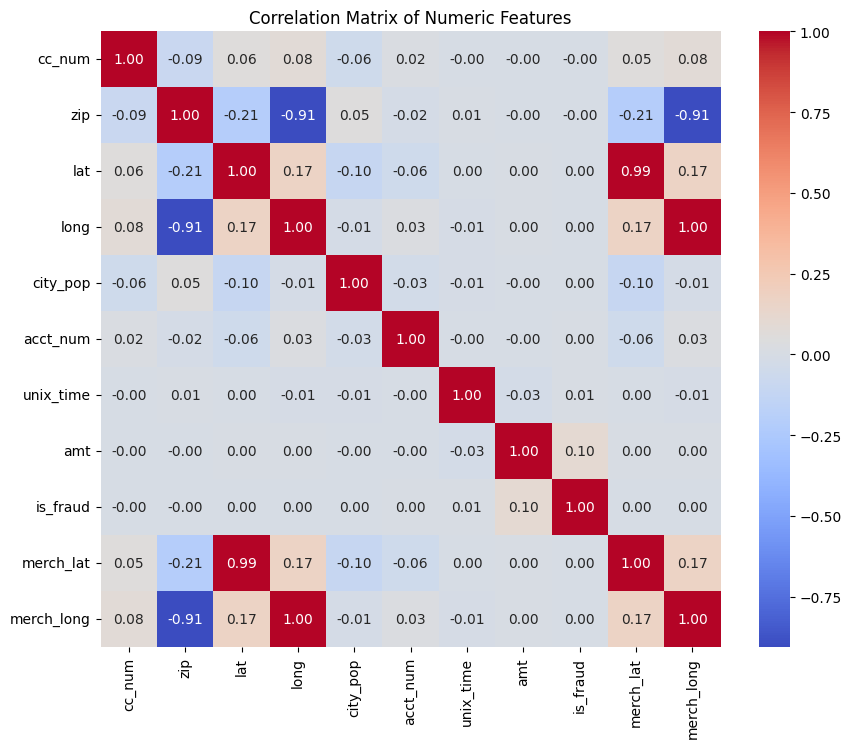

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df2 is DataFrame containing the numerical columns
numerical_columns = [
    'cc_num', 'zip', 'lat', 'long', 'city_pop', 'acct_num', 'unix_time',
    'amt', 'is_fraud', 'merch_lat', 'merch_long'
]

# Select only the specified numerical columns
numeric_data = df2[numerical_columns]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

<ipython-input-28-2a4dc87b859f>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='coolwarm')


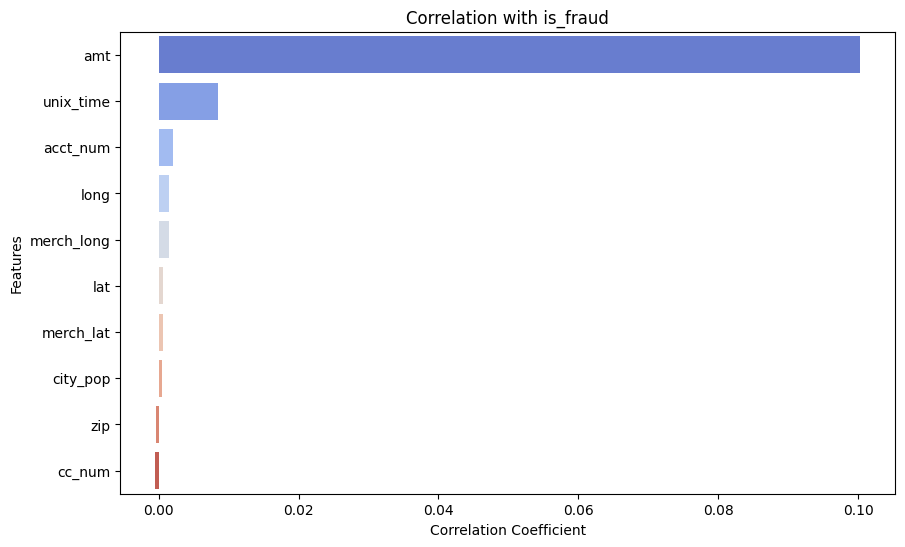

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df2 is DataFrame containing the numerical columns
numerical_columns = [
    'cc_num', 'zip', 'lat', 'long', 'city_pop', 'acct_num', 'unix_time',
    'amt', 'is_fraud', 'merch_lat', 'merch_long'
]

# Select only the specified numerical columns
numeric_data = df2[numerical_columns]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Extract the correlations with the target variable 'is_fraud'
corr_with_target = corr_matrix['is_fraud'].drop('is_fraud')

# Sort the correlations to identify the most positively and negatively correlated features
sorted_corr = corr_with_target.sort_values(ascending=False)

# Plot the sorted correlations as a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_corr.values, y=sorted_corr.index, palette='coolwarm')
plt.title('Correlation with is_fraud')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

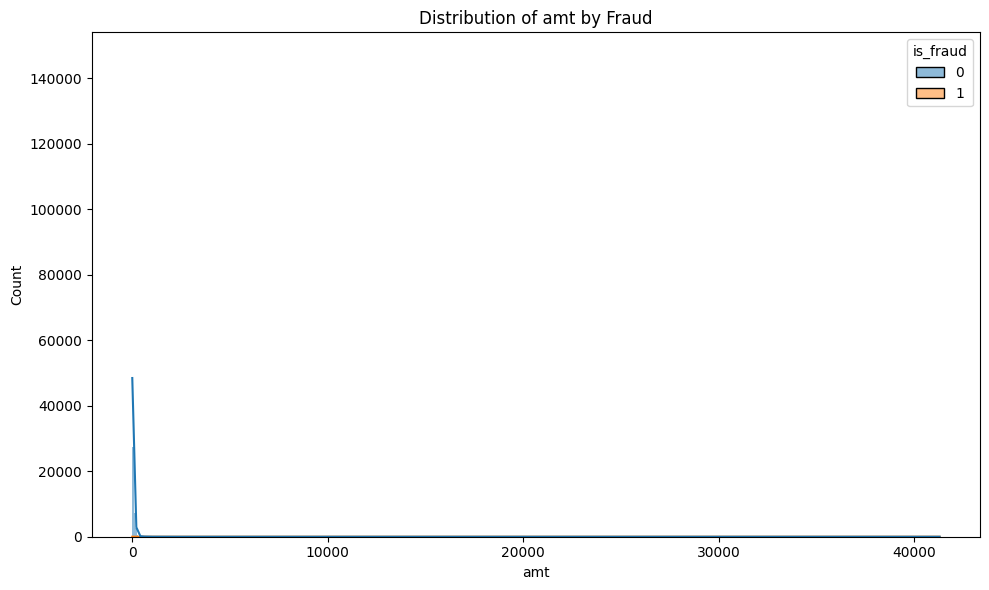

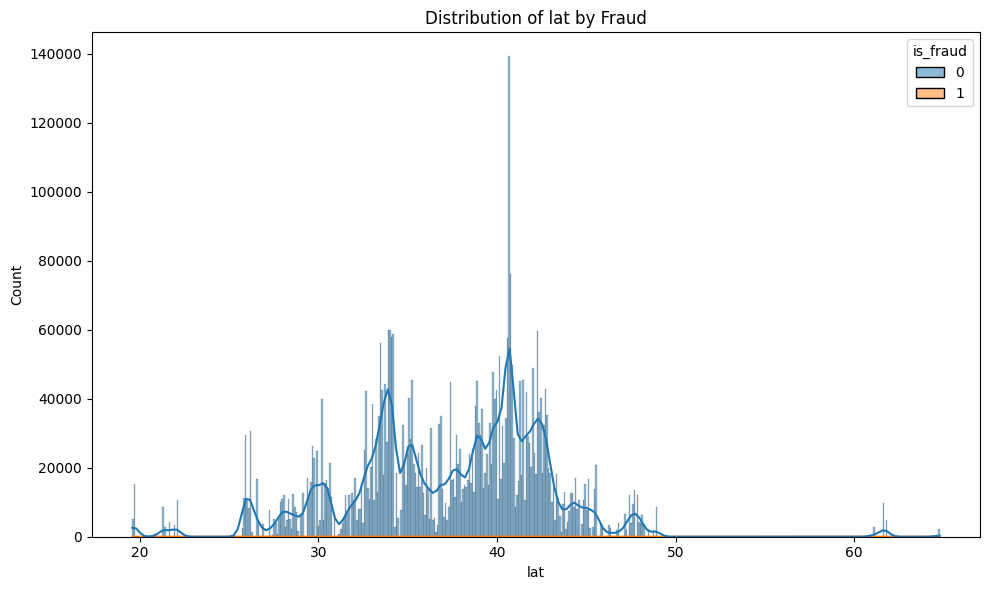

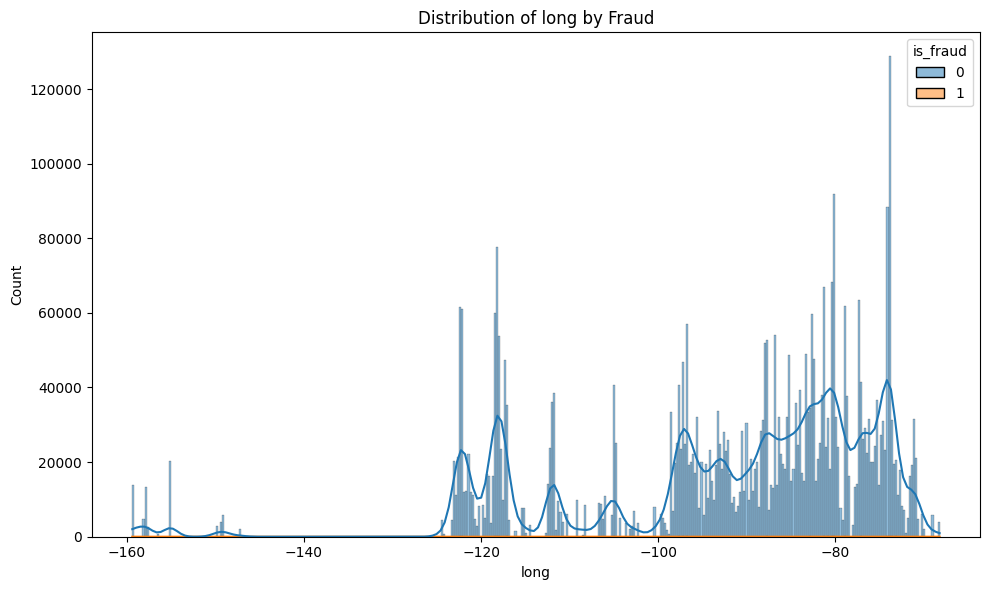

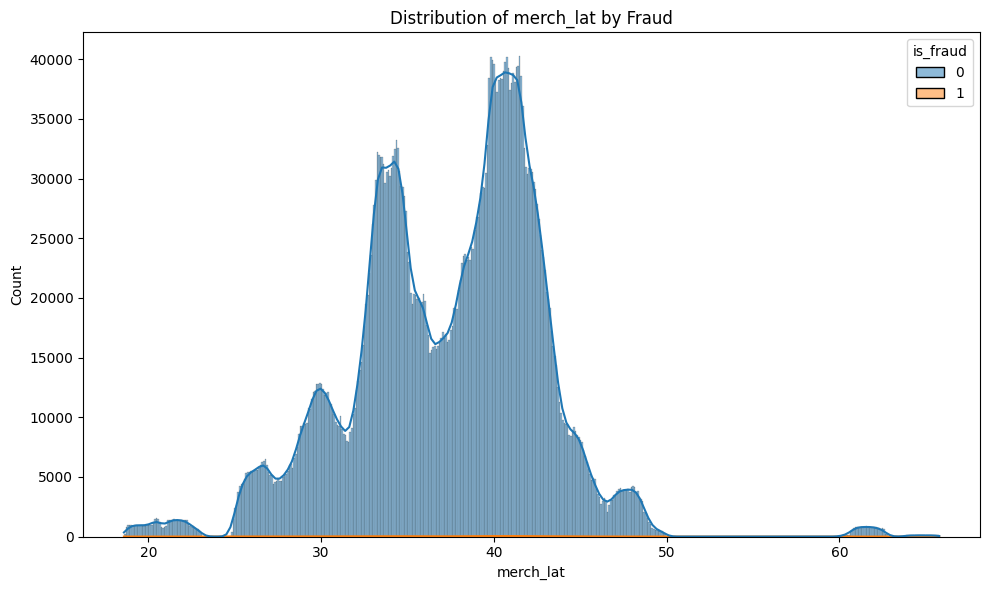

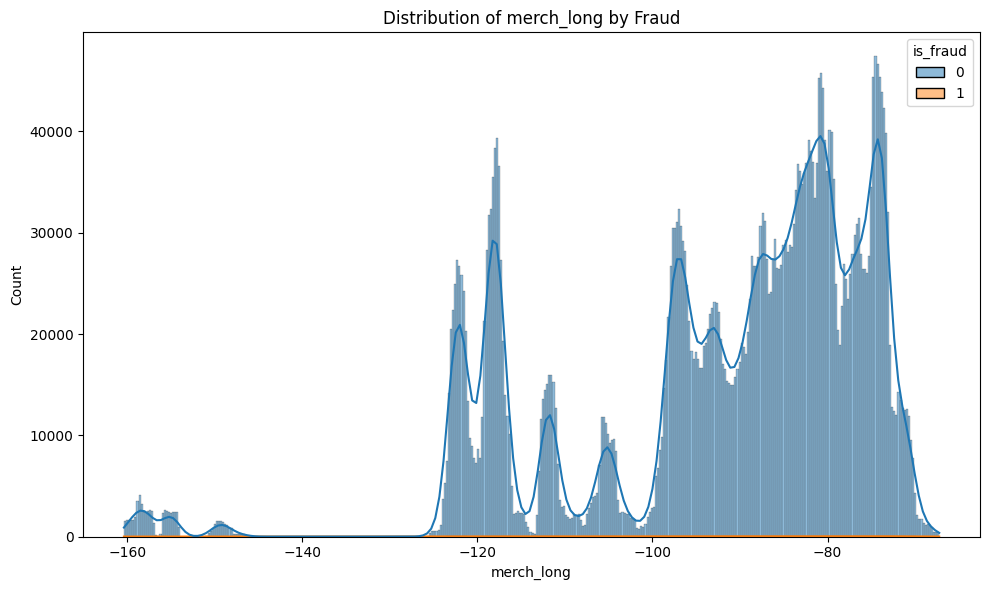

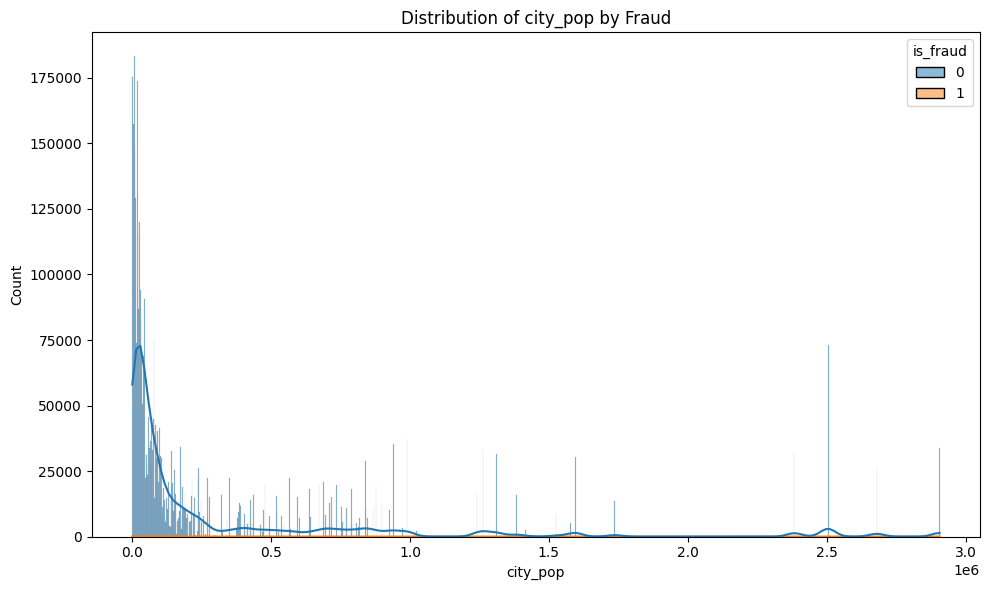

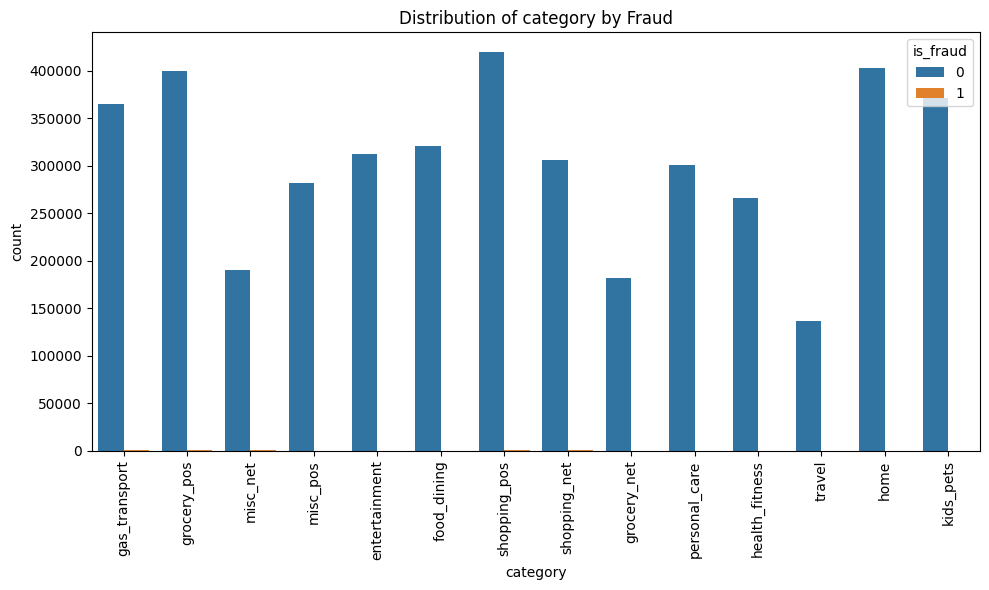

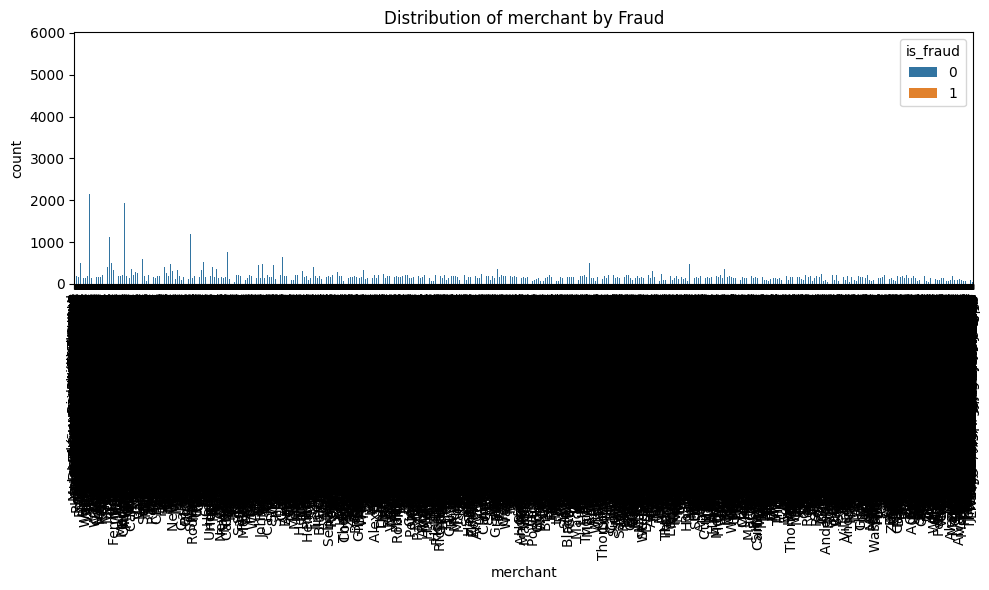

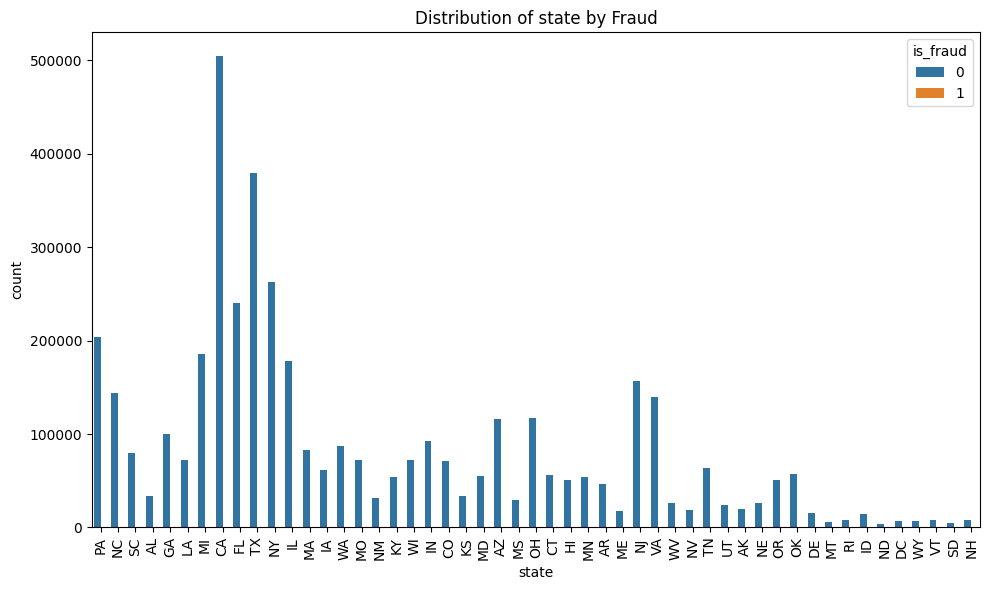

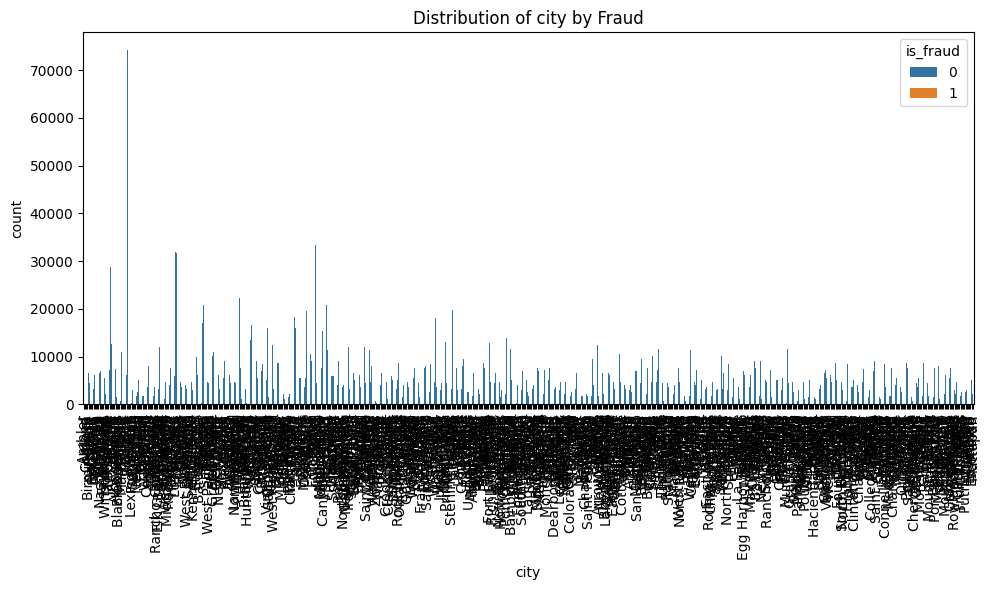

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df2 is DataFrame and 'is_fraud' is the target variable
features = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop',
            'category', 'merchant', 'state', 'city']

# Plotting each feature individually
for feature in features:
    plt.figure(figsize=(10, 6))
    if df2[feature].dtype in ['float64', 'int64']:
        # For numerical features, plot the distribution
        sns.histplot(data=df2, x=feature, hue='is_fraud', kde=True)
        plt.title(f'Distribution of {feature} by Fraud')
    else:
        # For categorical features, plot the count plot
        sns.countplot(x=feature, data=df2, hue='is_fraud')
        plt.title(f'Distribution of {feature} by Fraud')
        plt.xticks(rotation=90)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt

### 5. Prepare Data

In [33]:
# Select relevant features
features = [
    'amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop',
    'category', 'merchant', 'state', 'city'
]

### 6. Split Dataset

In [34]:
X = df2[features]
y = df2['is_fraud']  # This is the target variable for evaluation purposes

In [35]:
# Preprocess the data
numeric_features = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop']
categorical_features = ['category', 'merchant', 'state', 'city']

In [36]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [37]:
# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', IsolationForest(contamination=0.1, random_state=42))
])


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 7. Train Machine Learning Model - Isolation forest

In [39]:
# Fit the model
pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amt', 'lat', 'long',
                                                   'merch_lat', 'merch_long',
                                                   'city_pop']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['category', 'merchant',
                                                   'state', 'city'])])),
                ('model', IsolationForest(contamination=0.1, random_state=42))])

In [40]:
# Predict anomalies
X_test['anomaly'] = pipeline.predict(X_test)

In [41]:
# Map -1 (anomaly) to True and 1 (normal) to False
X_test['anomaly'] = X_test['anomaly'] == -1

In [42]:
# Print the results
print(X_test)

            amt      lat      long  merch_lat  merch_long  city_pop  \
3508469  475.13  39.1375  -94.6792  39.942977  -94.913822    150224   
703102     8.50  30.1743  -97.8225  30.869259  -97.842750    940359   
799491     4.27  42.9566  -85.4810  42.058078  -86.314825     18701   
536689    58.14  34.7901  -82.5937  35.247646  -82.915858     60135   
2861582   32.44  31.5494 -106.2038  31.856040 -107.034311      5772   
...         ...      ...       ...        ...         ...       ...   
1248938   35.86  38.8149  -77.1210  38.368762  -76.297692    321490   
468615    40.42  26.1771  -98.1870  26.880096  -98.716172     70840   
3658831   74.58  40.6048  -74.4427  39.732712  -74.496617     71485   
496223     2.66  38.7894  -77.2818  38.031474  -76.886402     43102   
3710596   64.77  39.7312 -104.9129  40.144586 -105.700899    990452   

               category                       merchant state         city  \
3508469  health_fitness   Warner, Stewart and Mitchell    KS  Kansas C

### 8. Assess Model Performance

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, X_test['anomaly']))
print("\nClassification Report:")
print(classification_report(y_test, X_test['anomaly']))

Confusion Matrix:
[[766642  84505]
 [   953     81]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    851147
           1       0.00      0.08      0.00      1034

    accuracy                           0.90    852181
   macro avg       0.50      0.49      0.47    852181
weighted avg       1.00      0.90      0.95    852181



In [44]:
# Compute Anomaly Scores (y_scores)
y_scores = X_test['anomaly']

# Compute True Labels (y_true)
y_true = y_test

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, confusion_matrix, classification_report

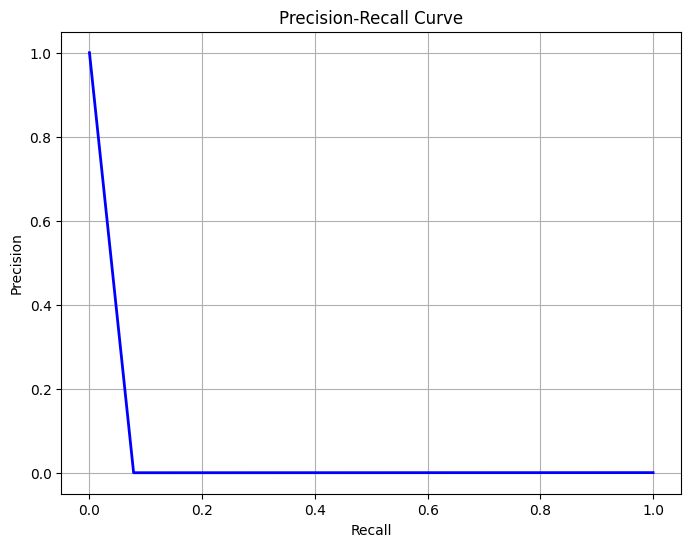

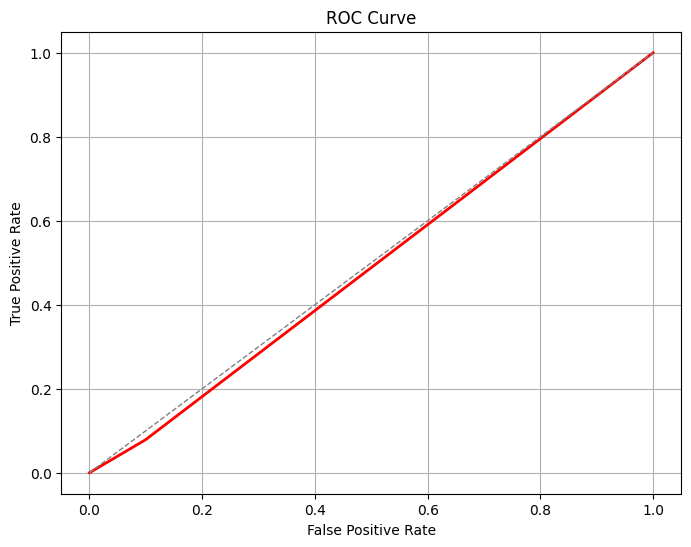

ROC AUC Score: 0.48952644227842834


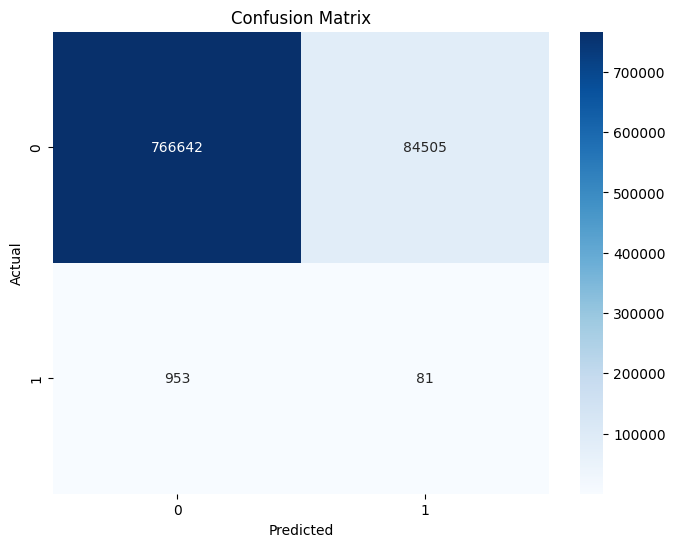


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    851147
           1       0.00      0.08      0.00      1034

    accuracy                           0.90    852181
   macro avg       0.50      0.49      0.47    852181
weighted avg       1.00      0.90      0.95    852181



In [47]:
# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random Guess Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_true, y_scores)
print(f'ROC AUC Score: {roc_auc}')

# Confusion Matrix Heatmap
cm = confusion_matrix(y_true, X_test['anomaly'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, X_test['anomaly']))

### 9. Train Machine Learning Model - K means clustering

In [48]:
from sklearn.cluster import KMeans

In [49]:
X = df2[features]
y = df2['is_fraud']  # Target variable


In [50]:
# Preprocess the data
numeric_features = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop']
categorical_features = ['category', 'merchant', 'state', 'city']

In [51]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [52]:
# Apply preprocessing to X
X_processed = preprocessor.fit_transform(X)

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)


In [54]:
# Fit K-means clustering model
kmeans = KMeans(n_clusters=2)  # Assuming 2 clusters - normal and anomalous
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [55]:
# Predict cluster labels
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

In [56]:
# Determine the majority cluster label for training data
train_majority_label = np.bincount(train_cluster_labels).argmax()

# Determine the majority cluster label for testing data
test_majority_label = np.bincount(test_cluster_labels).argmax()

# Map cluster labels to anomaly labels
train_anomaly_labels = train_cluster_labels != train_majority_label
test_anomaly_labels = test_cluster_labels != test_majority_label

In [57]:
# Print the results
print(X_test)

  (0, 0)	2.5094246106528497
  (0, 1)	0.3260312309675098
  (0, 2)	-0.1265798872287567
  (0, 3)	0.47055334081040734
  (0, 4)	-0.1399697500708915
  (0, 5)	-0.269611881782741
  (0, 11)	1.0
  (0, 20466)	1.0
  (0, 22013)	1.0
  (0, 22372)	1.0
  (1, 0)	-0.3737357287190672
  (1, 1)	-1.3112733124376807
  (1, 2)	-0.3071657609025225
  (1, 3)	-1.1778259954304575
  (1, 4)	-0.30814400646066065
  (1, 5)	1.1175072554916463
  (1, 17)	1.0
  (1, 1838)	1.0
  (1, 22040)	1.0
  (1, 22079)	1.0
  (2, 0)	-0.39987157132572176
  (2, 1)	1.0236648642367394
  (2, 2)	0.4018663263766984
  (2, 3)	0.8547937131100969
  (2, 4)	0.3537705966268955
  :	:
  (852178, 5)	-0.40784189785575126
  (852178, 8)	1.0
  (852178, 4906)	1.0
  (852178, 22028)	1.0
  (852178, 22561)	1.0
  (852179, 0)	-0.4098192561003586
  (852179, 1)	0.26244392826765367
  (852179, 2)	0.8729189447796297
  (852179, 3)	0.123299652040003
  (852179, 4)	0.8951352279709217
  (852179, 5)	-0.45766958865954926
  (852179, 11)	1.0
  (852179, 19959)	1.0
  (852179, 22042)	

In [58]:
# Evaluate the model
print("---- K-means Clustering for Anomaly Detection ----")
print("Train Confusion Matrix:")
print(confusion_matrix(y_train, train_anomaly_labels))
print("\nTrain Classification Report:")
print(classification_report(y_train, train_anomaly_labels))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, test_anomaly_labels))
print("\nTest Classification Report:")
print(classification_report(y_test, test_anomaly_labels))

---- K-means Clustering for Anomaly Detection ----
Train Confusion Matrix:
[[2107646 1297077]
 [   2462    1538]]

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76   3404723
           1       0.00      0.38      0.00      4000

    accuracy                           0.62   3408723
   macro avg       0.50      0.50      0.38   3408723
weighted avg       1.00      0.62      0.76   3408723


Test Confusion Matrix:
[[526840 324307]
 [   604    430]]

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76    851147
           1       0.00      0.42      0.00      1034

    accuracy                           0.62    852181
   macro avg       0.50      0.52      0.38    852181
weighted avg       1.00      0.62      0.76    852181



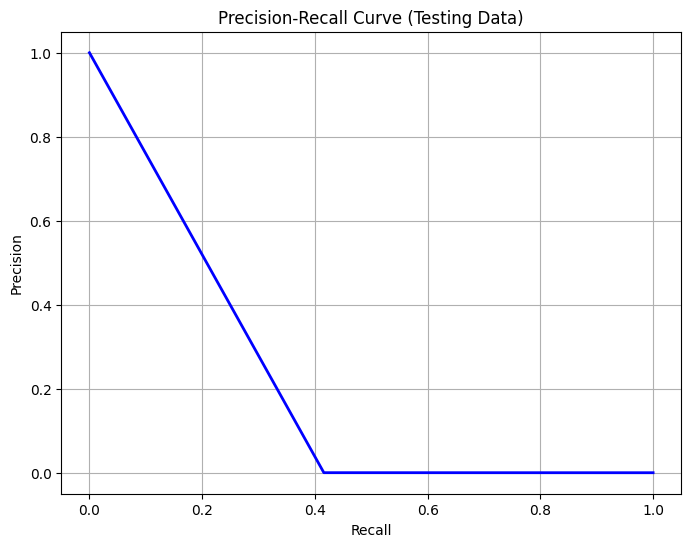

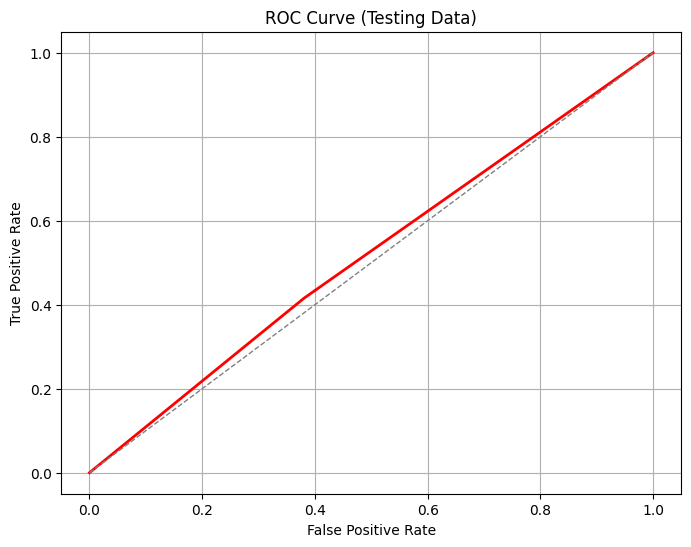

Testing Data ROC AUC Score: 0.5174186227650903


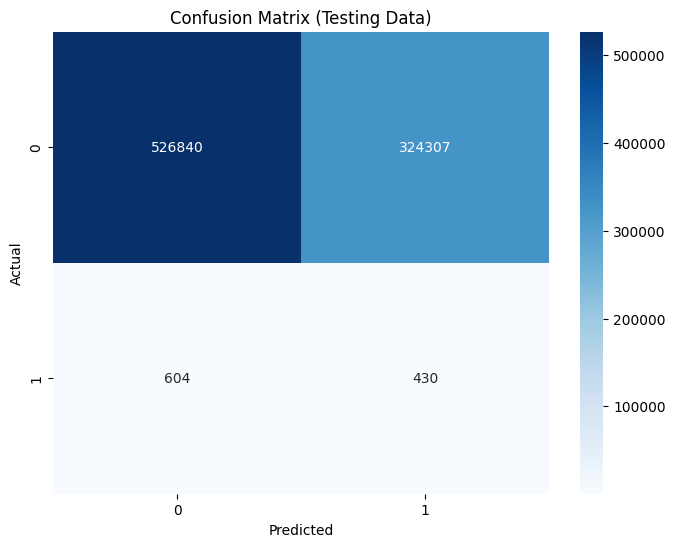


Testing Data Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.76    851147
           1       0.00      0.42      0.00      1034

    accuracy                           0.62    852181
   macro avg       0.50      0.52      0.38    852181
weighted avg       1.00      0.62      0.76    852181



In [59]:
# Compute Anomaly Scores (y_scores) for testing data
y_scores_test = test_anomaly_labels.astype(int)  # K-means doesn't directly provide scores, using binary labels

# Compute True Labels (y_true) for testing data
y_true_test = y_test

# Plot Precision-Recall Curve for Testing Data
precision_test, recall_test, _ = precision_recall_curve(y_true_test, y_scores_test)
plt.figure(figsize=(8, 6))
plt.plot(recall_test, precision_test, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Testing Data)')
plt.grid(True)
plt.show()

# Plot ROC Curve for Testing Data
fpr_test, tpr_test, _ = roc_curve(y_true_test, y_scores_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random Guess Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Testing Data)')
plt.grid(True)
plt.show()

# ROC AUC Score for Testing Data
roc_auc_test = roc_auc_score(y_true_test, y_scores_test)
print(f'Testing Data ROC AUC Score: {roc_auc_test}')

# Confusion Matrix Heatmap for Testing Data
cm_test = confusion_matrix(y_true_test, test_anomaly_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

# Classification Report for Testing Data
print("\nTesting Data Classification Report:")
print(classification_report(y_true_test, test_anomaly_labels))

### 10. Train Machine Learning Model - Local Outlier Factor (LOF) model

In [60]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [61]:
# Select relevant features
features = [
    'amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop',
    'category', 'merchant', 'state', 'city'
]

In [62]:
X = df2[features]
y = df2['is_fraud']  # Target variable

In [63]:
# Preprocess the data
numeric_features = ['amt', 'lat', 'long', 'merch_lat', 'merch_long', 'city_pop']
categorical_features = ['category', 'merchant', 'state', 'city']


In [64]:
# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [65]:
# Apply preprocessing to X
X_processed = preprocessor.fit_transform(X)

In [66]:
# Apply TruncatedSVD for dimensionality reduction
svd = TruncatedSVD(n_components=10)  # Example: reduce to 10 components
X_reduced = svd.fit_transform(X_processed)

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [68]:
# Define and train the Local Outlier Factor (LOF) model
lof_model = LocalOutlierFactor(novelty=True)
lof_model.fit(X_train)

LocalOutlierFactor(novelty=True)

In [69]:
# Predict anomalies
lof_pred = lof_model.predict(X_test)

# Map -1 (anomaly) to True and 1 (normal) to False
lof_pred = lof_pred == -1

In [70]:
# Print the results
print(X_test)

[[-0.29691442  0.5660134   2.31764598 ...  0.01486777  0.09151172
   0.04461349]
 [ 1.68860838 -1.11104044 -0.71795413 ...  0.60385896  0.49542181
   0.16111652]
 [-1.3655348   0.62167342 -0.22657132 ...  0.04379618  0.14007294
   0.05282073]
 ...
 [-1.58372647 -0.47799481  0.18101137 ... -0.22250435  0.25467662
   0.76836731]
 [-1.11169662 -0.64171668 -0.16944121 ... -0.06664454  0.04903388
   0.03560827]
 [ 0.37167368  1.04640661 -0.6221336  ... -0.10081767  0.29912104
   0.77996092]]


In [71]:
# Evaluate the model
print("---- Local Outlier Factor (LOF) ----")
print("Confusion Matrix:")
print(confusion_matrix(y_test, lof_pred))
print("\nClassification Report:")
print(classification_report(y_test, lof_pred))

---- Local Outlier Factor (LOF) ----
Confusion Matrix:
[[848563   2584]
 [  1002     32]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    851147
           1       0.01      0.03      0.02      1034

    accuracy                           1.00    852181
   macro avg       0.51      0.51      0.51    852181
weighted avg       1.00      1.00      1.00    852181



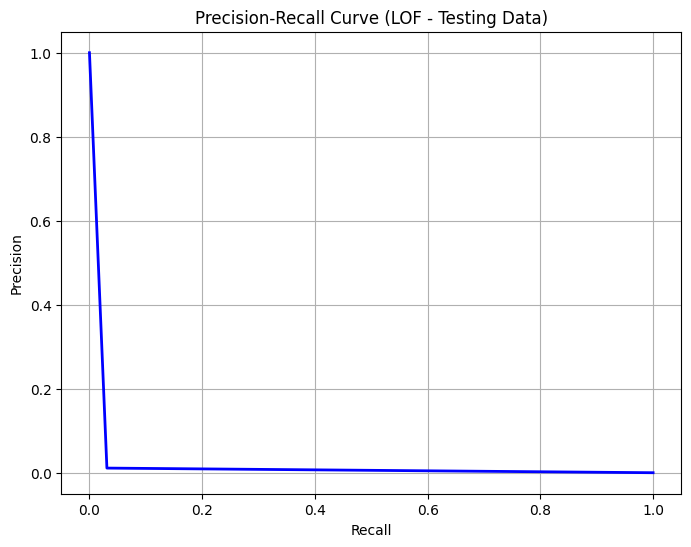

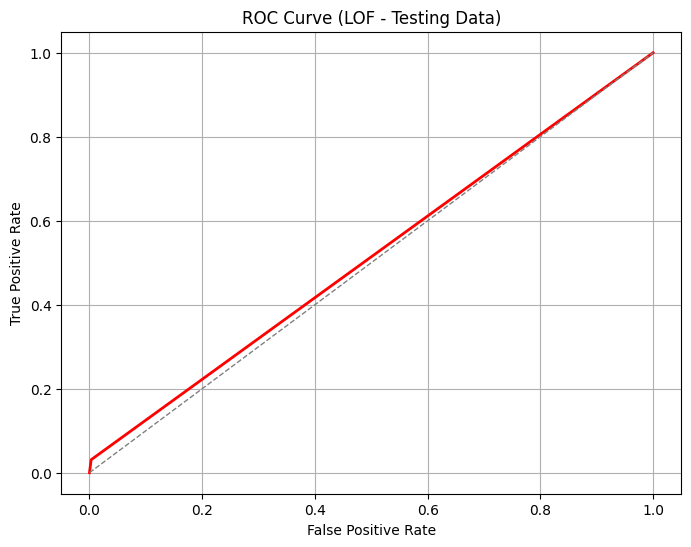

Testing Data ROC AUC Score (LOF): 0.5139559361561391


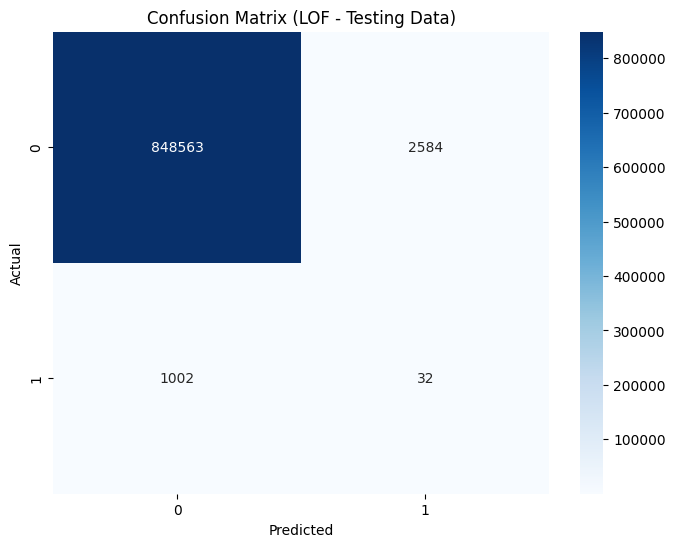


Testing Data Classification Report (LOF):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    851147
           1       0.01      0.03      0.02      1034

    accuracy                           1.00    852181
   macro avg       0.51      0.51      0.51    852181
weighted avg       1.00      1.00      1.00    852181



In [72]:
# Compute Anomaly Scores (y_scores) for testing data
y_scores_lof = lof_pred.astype(int)  # LOF doesn't directly provide scores, using binary labels

# Compute True Labels (y_true) for testing data
y_true_lof = y_test

# Plot Precision-Recall Curve for Testing Data
precision_lof, recall_lof, _ = precision_recall_curve(y_true_lof, y_scores_lof)
plt.figure(figsize=(8, 6))
plt.plot(recall_lof, precision_lof, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (LOF - Testing Data)')
plt.grid(True)
plt.show()

# Plot ROC Curve for Testing Data
fpr_lof, tpr_lof, _ = roc_curve(y_true_lof, y_scores_lof)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lof, tpr_lof, color='red', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random Guess Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (LOF - Testing Data)')
plt.grid(True)
plt.show()

# ROC AUC Score for Testing Data
roc_auc_lof = roc_auc_score(y_true_lof, y_scores_lof)
print(f'Testing Data ROC AUC Score (LOF): {roc_auc_lof}')

# Confusion Matrix Heatmap for Testing Data
cm_lof = confusion_matrix(y_true_lof, lof_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lof, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (LOF - Testing Data)')
plt.show()

# Classification Report for Testing Data
print("\nTesting Data Classification Report (LOF):")
print(classification_report(y_true_lof, lof_pred))